In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("marketing_AB.csv", index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [5]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [6]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [7]:
# Check if we have duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

np.int64(0)

In [8]:
df.drop(columns = 'user id', inplace=True, axis=1)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [10]:
df_cat = df[['test group', 'converted', 'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [11]:
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [12]:
def format_hour(hour):
    return pd.to_datetime(str(hour), format='%H').strftime('%I:00 %p')

df['ads time'] = df['most ads hour'].apply(format_hour)


In [13]:
df_cat['ads time'] = df['ads time']

In [14]:
df_cat.head()

,test group,converted,most ads day,most ads hour,ads time
0,ad,False,Monday,20,08:00 PM
1,ad,False,Tuesday,22,10:00 PM
2,ad,False,Tuesday,18,06:00 PM
3,ad,False,Tuesday,10,10:00 AM
4,ad,False,Friday,14,02:00 PM


* We have converter the most ads hour to actual time of the day for better interpretability.

## **Univariate Analysis** 

### Analysis of variable `test group`

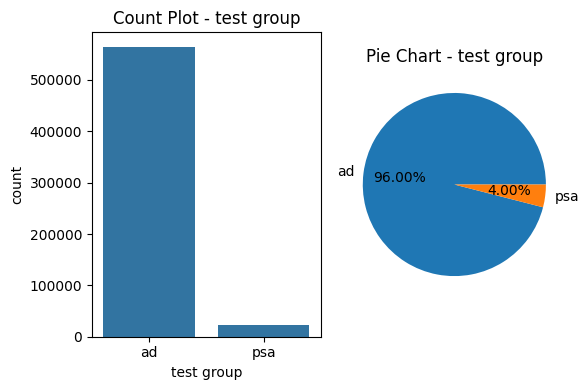

In [15]:
variable = 'test group'
#Count plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()

# Show the plots
plt.show()



### Analysis of variable `most ads day`

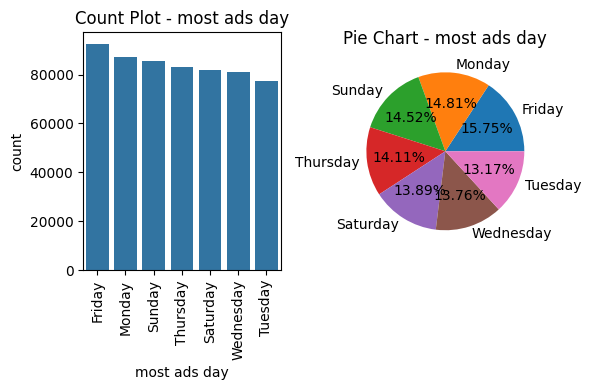

In [16]:
variable = 'most ads day'
#Count plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()

# Show the plots
plt.show()



### Analysis of variable `ads time`

* This is the variable derived after coverting `most ads day` to actual time of the day

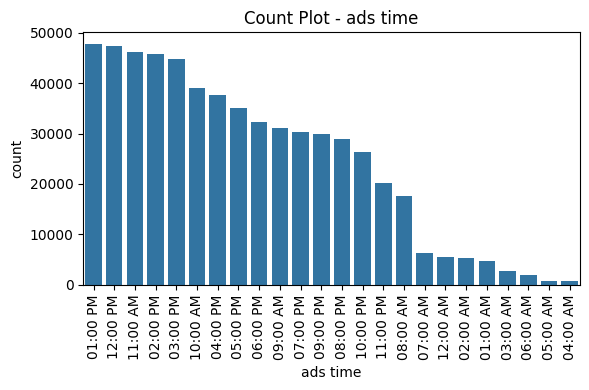

In [17]:
variable = 'ads time'
#Count plot
plt.figure(figsize = (6,4))
sns.countplot(x= variable, data=df_cat, order = df_cat['ads time'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.tight_layout()

# Show the plots
plt.show()



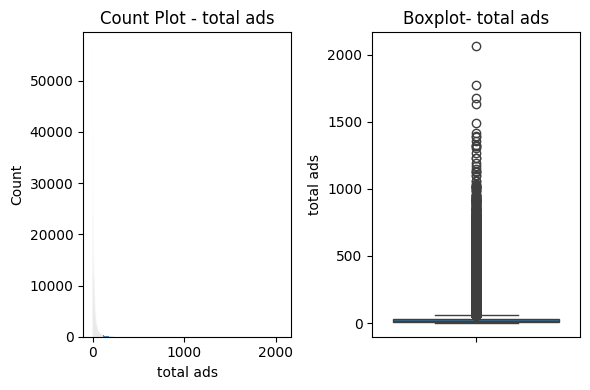

In [18]:
variable = 'total ads'
#Count plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable, data=df)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data=df)
plt.title(f'Boxplot- {variable}')

plt.tight_layout()

# Show the plots
plt.show()



* Since nothing is clear from these plots, we check if there are some outliers and then try to limit our data

In [19]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

* As we can see, the max = 2065. So, we'll consider `total ads` < 50  

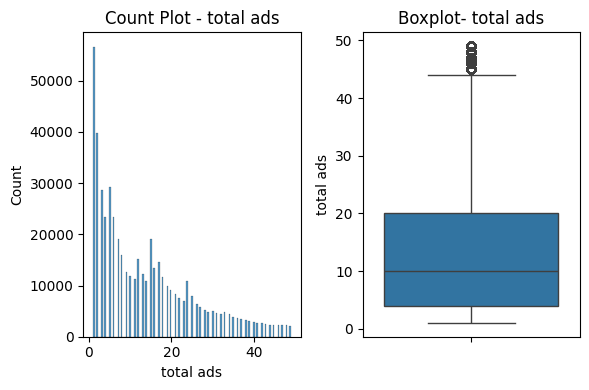

In [20]:
variable = 'total ads'
#Count plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable, data=df[df['total ads']<50])
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data=df[df['total ads']<50])
plt.title(f'Boxplot- {variable}')

plt.tight_layout()

# Show the plots
plt.show()



## Bivariate Analysis

* In this part, we'll build some cross tabulations

In [21]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

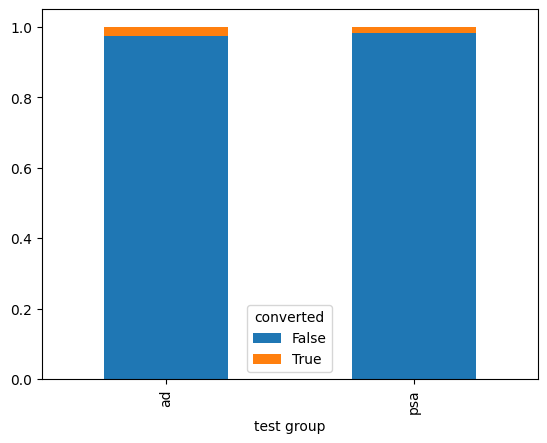

In [22]:
ct_conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

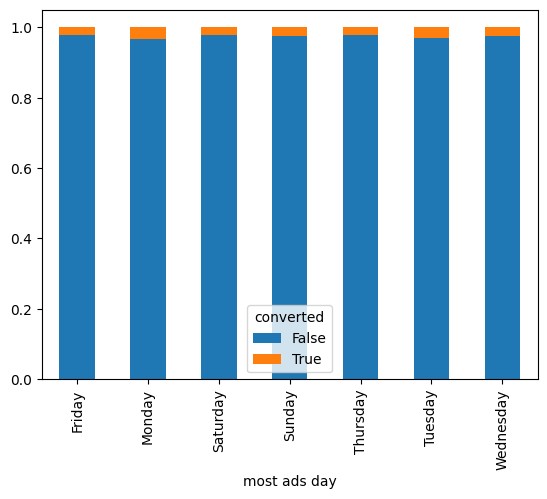

In [23]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize ='index')
print(ct_conversion_day.sort_values(by= True, ascending =False))
ct_conversion_day.plot.bar(stacked=True)

* Most people bought on Monday

converted     False     True 
ads time                     
04:00 PM   0.969228  0.030772
08:00 PM   0.970197  0.029803
03:00 PM   0.970347  0.029653
09:00 PM   0.971077  0.028923
05:00 PM   0.971790  0.028210
02:00 PM   0.971937  0.028063
06:00 PM   0.972620  0.027380
07:00 PM   0.973280  0.026720
10:00 PM   0.973895  0.026105
01:00 PM   0.975323  0.024677
12:00 PM   0.976172  0.023828
11:00 PM   0.977338  0.022662
06:00 AM   0.977756  0.022244
11:00 AM   0.977884  0.022116
10:00 AM   0.978479  0.021521
05:00 AM   0.979085  0.020915
08:00 AM   0.980484  0.019516
09:00 AM   0.980809  0.019191
12:00 AM   0.981575  0.018425
07:00 AM   0.981889  0.018111
04:00 AM   0.984765  0.015235
01:00 AM   0.987089  0.012911
03:00 AM   0.989548  0.010452
02:00 AM   0.992687  0.007313


<Axes: xlabel='ads time'>

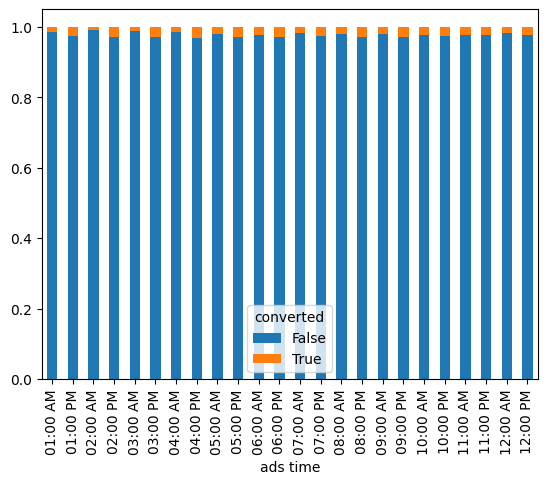

In [24]:
ct_conversion_hour = pd.crosstab(df['ads time'], df['converted'], normalize ='index')
print(ct_conversion_hour.sort_values(by= True, ascending =False))
ct_conversion_hour.plot.bar(stacked=True)

* Most people bought at 4:00PM

<Axes: xlabel='converted', ylabel='total ads'>

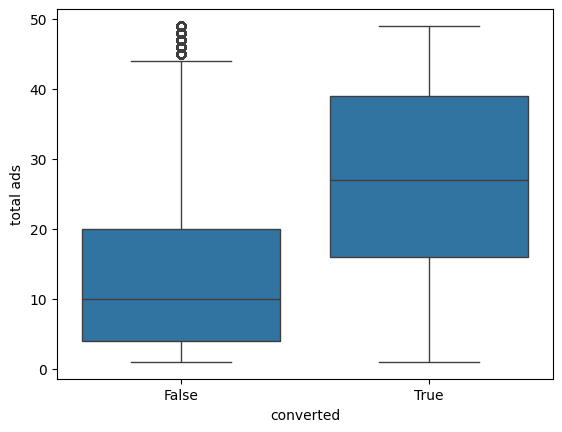

In [25]:
sns.boxplot(x='converted', y = 'total ads', data = df[df['total ads']<50])

* From this we can infer that the people who converted were shown more ads than the one who didn't since the median of the two differs.

## Statistical Test

#### First we'll pair categorical features with Converted 

* For comparing two categorical features, we use Chi-square test

In [26]:
from scipy.stats import chi2_contingency
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        # Create a contingency table (cross-tabulation)
        ct = pd.crosstab(df[variable],df['converted'])

        # Perform chi-squared test
        chi2, p, _,_ = chi2_contingency(ct)

        # Display the results
        print(f"\nChi-Squared test for {variable} vs converted:")
        print(f"Chi-Squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significannce
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is not significant difference in conversion rates across {variable} ")


Chi-Squared test for test group vs converted:
Chi-Squared value: 54.005823883685245
p-value: 1.9989623063390078e-13
The difference in conversion rates across test group is statistically significant.

Chi-Squared test for most ads day vs converted:
Chi-Squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-Squared test for most ads hour vs converted:
Chi-Squared value: 430.76869230822086
p-value: 8.027629823696774e-77
The difference in conversion rates across most ads hour is statistically significant.

Chi-Squared test for ads time vs converted:
Chi-Squared value: 430.76869230822086
p-value: 8.027629823696774e-77
The difference in conversion rates across ads time is statistically significant.


### Now we'll pair numerical feature with Converted

Shapiro Test (For Normality)

* We'll first check for normality of data and we'll do this by sample i.e we'll segregate the feature total ads into whether its the total number of ads seen by people who have converted and who have not converted.

Levene Test (For equality of variance)
  

In [27]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro–Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro–Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")


Shapiro–Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro–Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


* Since all the p-values are below 0.05, we conclude:
  1. Data is not normally distributed
  2. Varainces are not equal
* Therefore, we need to choose a non-parametric test.

In [28]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann–Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann–Whitney U test: p-value = {u_p_value}")

Mann–Whitney U test: p-value = 0.0


* Therefore total ads seen by people also affects the conversion rate.